FAKE NEWS UNIT 🕵️🕵️🕵️

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter

In [16]:
df_fake = pd.read_csv("../../data/raw/Fake.csv")
df_real = pd.read_csv("../../data/raw/True.csv")


In [4]:
df_fake.isnull().sum()
df_real.isnull().sum()


title      0
text       0
subject    0
date       0
dtype: int64

In [17]:
df_fake['label'] = "FAKE"
df_real['label'] = 'REAL'

In [10]:
df_fake.head()

0     Donald Trump Sends Out Embarrassing New Year’...
1     Drunk Bragging Trump Staffer Started Russian ...
2     Sheriff David Clarke Becomes An Internet Joke...
3     Trump Is So Obsessed He Even Has Obama’s Name...
4     Pope Francis Just Called Out Donald Trump Dur...
dtype: object

In [7]:
df_fake['text'] = df_fake['title'] + ' ' + df_fake['text']

In [18]:
df_fake['label'].value_counts()

label
FAKE    23481
Name: count, dtype: int64

In [22]:
df_fake = df_fake[['text','label']]
df_fake.head()

,text,label
0,Donald Trump just couldn t wish all Americans ...,FAKE
1,House Intelligence Committee Chairman Devin Nu...,FAKE
2,"On Friday, it was revealed that former Milwauk...",FAKE
3,"On Christmas day, Donald Trump announced that ...",FAKE
4,Pope Francis used his annual Christmas Day mes...,FAKE


In [24]:
df_real = df_real[['text','label']]
df_real.head()

,text,label
0,WASHINGTON (Reuters) - The head of a conservat...,REAL
1,WASHINGTON (Reuters) - Transgender people will...,REAL
2,WASHINGTON (Reuters) - The special counsel inv...,REAL
3,WASHINGTON (Reuters) - Trump campaign adviser ...,REAL
4,SEATTLE/WASHINGTON (Reuters) - President Donal...,REAL


In [25]:
df = pd.concat([df_real,df_fake])

In [28]:
df.head()
df['label'].value_counts()

label
FAKE    23481
REAL    21417
Name: count, dtype: int64

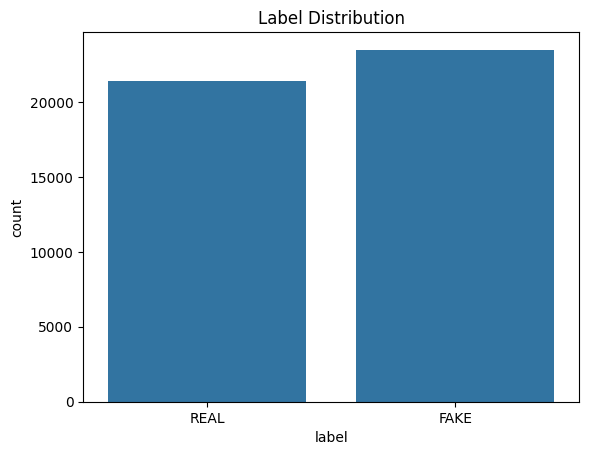

In [29]:
sns.countplot(x='label',data=df)
plt.title('Label Distribution')
plt.show()

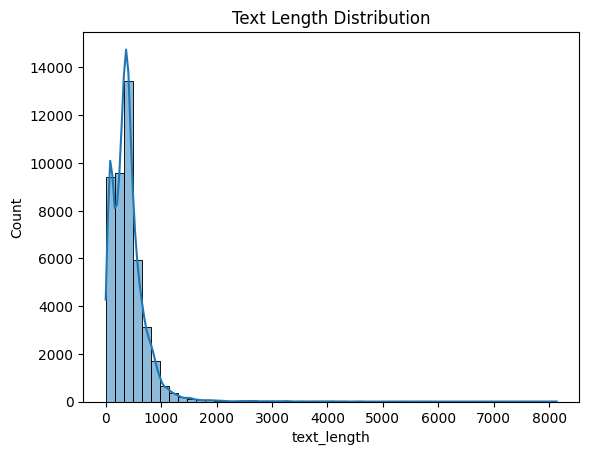

In [30]:
df['text_length']  = df['text'].apply(lambda x: len(str(x).split()))
sns.histplot(df['text_length'],bins=50, kde=True)
plt.title("Text Length Distribution")
plt.show()

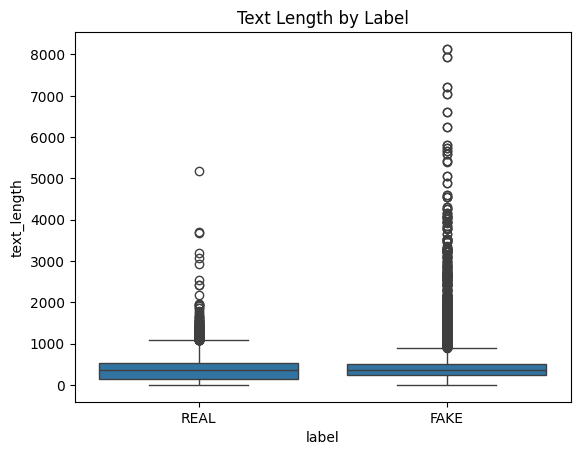

label
FAKE    423.197905
REAL    385.640099
Name: text_length, dtype: float64


In [32]:
df['text_length'] = df['text'].astype(str).apply(lambda x: len(x.split()))

sns.boxplot(x='label',y='text_length',data=df)
plt.title("Text Length by Label")
plt.show()

print(df.groupby('label')['text_length'].mean())